# Lab 2 – Linear Regression
## PART 1 Univariable Linear Regression

Objectives: Implement linear regression with one variable (feature) and get to see it works on data

In this part of the lab work you will implement Univariate Linear Regression to predict profits for a food truck (a large vehicle equipped to cook and sell food). Suppose you are the CEO of a restaurant franchise and consider different cities for opening a new food truck. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select in which city to expand your business.

First, import all relevant libraries. 

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load and Plot the Data. 

The file *Uni_linear.txt* contains the dataset for the Linear Regression problem. The first column is the population of a city (variable X) and the second column is the profit of a food truck in that city (variable y). The values are scaled: number of people/10000 and profit in dolars/10000. A negative value for profit indicates a loss. 

Load data into the variable **data** (using function pd.read_csv from panda library).

Create a scatter plot of data similar to Fig.1 (using plt.scatter). 

<img src="images/f1.png" style="width:350px;height:250px;">
<caption><center> **Fig. 1** : **file Uni_linear.txt** </center></caption>

 

In [104]:
#data=pd.read_csv(x, y)
data=pd.read_csv('Uni_linear.txt')

In [105]:
#a few examples from the dataset 
data.head()


,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [106]:
#Some statistics
data.describe()

,6.1101,17.592
count,96.000000,96.000000
mean,8.181151,5.716709
std,3.884451,5.404947
min,5.026900,-2.680700
25%,5.690950,1.952550
50%,6.735950,4.455300
75%,8.639925,6.879150
max,22.203000,24.147000


Text(0.5, 1.0, 'cost function')

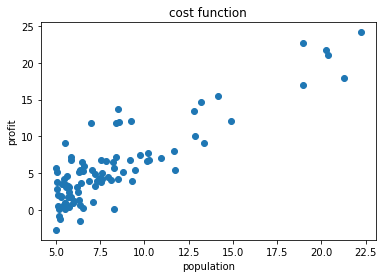

In [107]:
#Create Fig. 1  (using plt.scatter)
dataA = np.array(data)
data_x = dataA[:,0]
data_y = dataA[:,1]
plt.scatter(data_x,data_y)
plt.xlabel('population')
plt.ylabel('profit')
plt.title('cost function')
#Add labels : plt.xlabel; plt.ylabel; plt.title


# Compute the Cost Function $J(\theta)$

The objective of Linear Regression is to minimize the cost function: $J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$

where the hypothesis *h* is given by the linear model: $h_\theta(x)=\theta^Tx=\theta_0+\theta_1x_1$ 

Your task is to complete the function **computeCost(X,y,theta)**.  Remember that the variables X and y are not scalar values, X is an array (matrix) with dimension (*mx2*), y is an array (vector) with dimension (*mx1*), *m* rows represent the examples from the training set.

Suggestion: Use the vectorized dot product with *np.dot()* to generate *h*. 
Use *np.sum()* to compute the sum of errors over all given examples. 


In [108]:
import numpy as np

def computeCost(X,y,theta):
    """
   Take the numpy arrays X, y, theta and return the cost function J for this theta. 

    """
    m=len(y)
    h=np.dot(X,theta)
    square_err=np.square(h-y)
    J= np.dot((1/(2*m)),np.sum(square_err))
    

    
    return J

Now you will provide values for the arguments of **computeCost(X,y,theta)**. 
First, extract X and y from data. 

Check if X and y are rank 1 arrays (m,), and if yes, you need to reshape them to be 2-dimensonal arrays (m,1).  
Each example is stored as a row.  


In [109]:
data_n=data.values # extract only the values of the two columns from the variable (structure) data
X= data_n[:,0]
y= data_n[:,1]

m=len(y)

#To take into account the intercept term theta_0 you need to add an additional first column to X and 
#set it to all ones (np.ones). #This allows to treat  theta_0 as simply another ‘feature parameter’. 

y=y.reshape(m,1)
X=X.reshape(m,1)

uns = np.ones((m,1))


X=np.append(uns,X,axis=1) #axis=0 are the rows, axis=1 are the columns


#Initialize the fitting parameters theta to 0 (np.zeros)

#theta=np.zeros((2,m))


theta=np.array([[0,0]])
theta = np.transpose(theta)
#theta.shape

#You should see a cost of about 32.07.

computeCost(X,y,theta)

30.79495785534583

### Gradient Descent

Minimize the cost function $J(\theta)$ by updating Equation        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$) and repeat unitil convergence. 


Implement gradient descent in the function **gradientDescent**. The loop structure is written, you need to supply the updates to $\theta$  within each iteration.  

In [110]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take numpy arrays X, y and theta and update theta by taking num_iters gradient steps with learning rate alpha
    
     Return: theta and the list of the cost of theta (J_history) during each iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        h = np.dot(X,theta)
        grad = np.dot(X.transpose(),(h-y)) #Vectorized way to compute all gradients simultaneously 
        theta= theta - (alpha * (1/m) * grad)
        
        #alpha.shape
        
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

Run  **gradientDescent** with learning rate alpha= 0.01 and 1500 iterations and get the final parameters $\theta_0$ = -3.630, $\theta_1$=1.166. 

In [125]:
alpha=0.01
num_iters=1500
theta=np.array([[-3.630,1.166]])
theta = np.transpose(theta)
theta,J_history = gradientDescent(X,y,theta,alpha,num_iters)

print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-4.17 + 1.21x1


### Visualising the Cost Function $J(\theta)$ 
To understand the cost function $J(\theta)$ better, we plot the cost in a 3D graph over a grid of values for $\theta_0$ and $\theta_1$. The cost function has a global minimum. This minimum is the optimal point for $\theta_0$ and $\theta_1$ and each step of gradient descent moves closer to this point.

In [112]:
from mpl_toolkits.mplot3d import Axes3D

In [113]:
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

Text(0.5, 0, '$J(\\Theta)$')

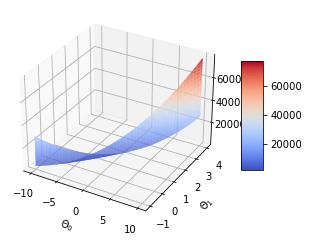

In [114]:
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")


### Testing the implementation

A good way to verify that gradient descent is working correctly is to plot $J(\theta)$ against the number of iteration. Function **gradientDescent** calls function **computeCost** on every iteration and saves the costs over the iterations. If the algorithm works properly, $J(\theta)$ should never increase, and should converge to a steady value. Plot the gradient history (use *plt.plot()*) and get a curve similar to Fig.2. 

<img src="images/f2.png" style="width:350px;height:250px;">
<caption><center> **Fig.2** : **$J(\theta)$** </center></caption>



Text(0.5, 1.0, 'Cost function using Gradient Descent')

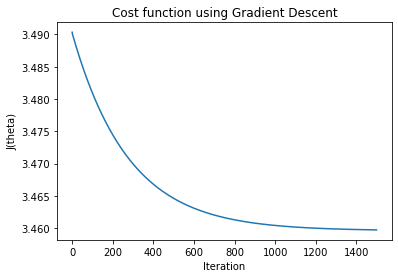

In [115]:
iteracoes = range(1500)
plt.plot(iteracoes,J_history)
#plt.axis([0,1500,4.5,6.5])

plt.xlabel('Iteration')
plt.ylabel('J(theta)')
plt.title('Cost function using Gradient Descent')
#Add labels : plt.xlabel; plt.ylabel; plt.title

### Graph with Best Line Fit 

Overlap data and the best line fit (with the optimized  $\theta$ values) as shown in Fig.3. 

<img src="images/f3.png" style="width:350px;height:250px;">
<caption><center> **Fig. 3** : ** ** </center></caption>

Text(0.5, 1.0, 'model equation')

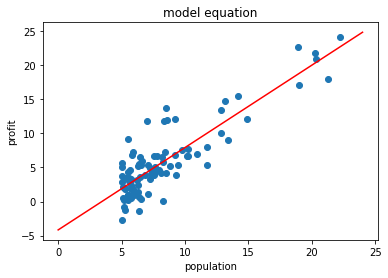

In [119]:
#plot data
#plt.scatter(data[0],data[1])

dataA = np.array(data)
data_x = dataA[:,0]
data_y = dataA[:,1]
plt.scatter(data_x,data_y)

#add the best line fit with red colour
x_fit=range(25)
y_fit=theta[0]+theta[1]*x_fit

plt.plot(x_fit,y_fit,'r')

plt.xlabel('population')
plt.ylabel('profit')
plt.title('model equation')

#Add labels : plt.xlabel; plt.ylabel; plt.title


### Make predictions  using the optimized $\theta$ values

Complete function **predict** to compute model predictions: $h_\theta(x) = \theta^Tx$. Apply vectorized computations with np.dot(). 


In [126]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    h= np.dot(x,theta)
    
    return h

Run  **predict** to predict profits in areas of 35,000 and 70,000 people. Note that you need to scale the numbers properly !

Answer: 

        For population = 35,000, predicted profit of 4520 USD

        For population = 70,000, predicted profit of 45342 USD

In [127]:
predict1= predict([1,3.5],theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1[0],0)))
print(predict1)

For population = 35,000, we predict a profit of $610.0
[609.60283201]


In [128]:
predict2= predict([1,7],theta)*10000
print("For population = 70,000, we predict a profit of $"+str(round(predict2[0],0)))
print(predict2)

For population = 70,000, we predict a profit of $42949.0
[42948.54980631]


##  PART 2 Multivariable Linear Regression
Objectives: Implement linear regression with multiple variables (features) and get to see it works on data. 

Now you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file **Multi_linear.txt** contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.  

Load the data into the array data2. 

In [ ]:
data2= ?

In [ ]:
#a few examples from the dataset 
data2.head()

In [ ]:
#Some statistics
data2.describe()

### Feature Normalization

Note that house sizes are much larger values (about 1000 times) than the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly. 
To make sure features are on a similar scale apply Mean normalization.

$x_i = \frac{x_i - \mu_i}{\sigma_i}$

Your task is to complete the code in function **featureNormalization(X)**:

• Compute the mean value  $\mu_i$ of each feature (use np.mean(X,axis=0)) 

• compute the standard deviation $\sigma_i$ of each feature (use np.std(X,axis=0)) 

• Apply the equation above.

**Remark:** When normalizing the features, it is important to store the mean value and the standard deviation used for normalization. After optimizing the parameters of the model, you want to predict the price of a new example not seen before.
You must first normalize the features of that new example using the mean and standard deviation previously computed from the training set.

**Remark:** Mean normalization is an alternative to normalizing by making the absolute values < 1 (i.e. dividing by MaxValue-MinValue).

In [ ]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=?
    std=?
    
    X_norm = ?
    
    return X_norm , mean , std

Extract from data2 the features in X2 and the output in y2. If rank 1, reshape them to have 2 dimensions. 

In [ ]:
data_n2=data2.values
X2 =?
y2=?

#Run featureNormalization to normalize X2, store the means and stds.
X2, mean_X2, std_X2 = ?

#After normalizing the features add an extra column of 1's corresponding to x0 = 1. 

X2=np.append(.....)


#Inicialize the vector of model parameters theta2 = 0.
theta2= ?

### Compute Cost $J(\theta)$
In the previous (univariate) problem you have implemented the functions **computeCost** and **gradientDescent** in a vectorized way, therefore they will work for linear regression with any number of features. 

Answer: Cost = 65591548106.46

In [ ]:
computeCost(X2,y2,theta2)

### Gradient Descent



Apply **gradientDescent** with different learning rates (e.g. alpha=[0.001, 0.01, 0.1, 0.3 1.4]) and 400 iterations.

You may need to adjust the number of iterations in order to see well the overall trend in $J(\theta)$ curve below.  

In [ ]:
#Inicialize theta2 = 0
#theta2= ?
theta2, J_history2 = gradientDescent(?,?,?,?,?)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

### Visualising the Cost Function $J(\theta)$

If the learning rate is too small (e.g. 0.001), the gradient descent takes a very long time to converge to the optimal value. 

If the learning rate is too large (e.g. 1.4), $J(\theta)$ can diverge and "blow up", resulting in values which are too large for computer calculations. In these situations, Python will return nan (not a number). This is often caused by undefined operations that involve +/- infinity.

Get a similar plot as in Fig.4. 

<img src="images/f4.png" style="width:350px;height:250px;">
<caption><center> **Fig. 4** Cost function for different learning rates ** ** </center></caption>

In [ ]:
plt.plot(?)


### Make predictions using the optimized $\theta$ values

Using the best learning rate you found, run gradient descent until convergence to find the optimal $\theta$ values.

Predict the price of a house with 1650 square feet and 3 bedrooms (use function predict you have implemented in Part 1). 

Don't forget to normalize the features, before making this prediction!

Answer: the price is about $293000.0


In [ ]:
x_sample =?
#feature normalisation of x_sample
x_sample= ?
#add 1
x_sample=
predict3=predict(?,?)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))